# **Importation**

In [2]:
import pandas as pd

In [3]:
web = pd.read_excel('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/P5+ERP+vin/web.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# **Nettoyage WEB**

In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
web['tax_class'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
1508    True
1509    True
1510    True
1511    True
1512    True
Name: tax_class, Length: 1513, dtype: bool

In [8]:
web['post_content'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
1508    True
1509    True
1510    True
1511    True
1512    True
Name: post_content, Length: 1513, dtype: bool

In [9]:
web['post_content_filtered'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
1508    True
1509    True
1510    True
1511    True
1512    True
Name: post_content_filtered, Length: 1513, dtype: bool

In [10]:
web['post_password'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
1508    True
1509    True
1510    True
1511    True
1512    True
Name: post_password, Length: 1513, dtype: bool

In [11]:
# Identifier les bons cadeaux
bons_cadeaux = web[web['sku'] == 'bon-cadeau-25-euros']
bons_cadeaux.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,NaN,publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [12]:
# Visualiser la colonne post_type
web['post_type']

0          product
1          product
2          product
3          product
4          product
           ...    
1508    attachment
1509    attachment
1510    attachment
1511    attachment
1512    attachment
Name: post_type, Length: 1513, dtype: object

In [13]:
attachment = web[web['post_type'] == 'attachment']
attachment.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,NaN,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,NaN,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [14]:
verification_doublons = web[web['post_date'] == '2018-02-08 12:58:52']
verification_doublons.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
# Regarder le nombre de doublons
web.duplicated('sku').sum()

798

In [16]:
#Pour supprimer les doublons sur des colonnes spécifiques, utilisez subset.
df_web = web.drop_duplicates(subset=['sku'])

In [17]:
# Regarder les données NULL
web[web['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
web['sku'].dropna()

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1428, dtype: object

In [19]:
# Check des infos de ma table
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                715 non-null    int64         
 2   downloadable           715 non-null    int64         
 3   rating_count           715 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

# **Nettoyage ERP**

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
erp = pd.read_excel('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/P5+ERP+vin/erp.xlsx')
erp.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [22]:
# Check des infos de ma table
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [23]:
# Regarder les données NULL
erp.isnull()

,product_id,onsale_web,price,stock_quantity,stock_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
820,False,False,False,False,False
821,False,False,False,False,False
822,False,False,False,False,False
823,False,False,False,False,False


In [24]:
# Regarder le nombre de doublons
erp.duplicated('product_id').sum()

0

# **Nettoyage LIAISON**

In [25]:
liaison = pd.read_excel('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/P5+ERP+vin/liaison.xlsx')
liaison.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [26]:
# Remplacer le nom id_web par sku
liaison.rename(columns={"id_web": "sku"}, inplace=True)
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [27]:
# Supprimer les données NULL
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [28]:
# Regarder les données NULL
liaison.isnull()

,product_id,sku
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
820,False,True
821,False,True
822,False,False
823,False,False


In [29]:
# Regarder le nombre de doublons pour sku
liaison.duplicated(['sku' , 'product_id'])

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

In [30]:
# Check les infos de ma table
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


# **Chiffre d'affaires par produit**

In [31]:
# Premier merge de la table liaison avec la table ERP 
df_bottleneck = pd.merge(liaison, erp, on='product_id', how='inner')
df_bottleneck.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [32]:
# Deuxième merge le premier merge et la table web
df_final = pd.merge(df_bottleneck, df_web, on='sku', how='inner')
df_final.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [33]:
# Afficher le prix par produit
print(df_final.groupby('post_name')[['price']].mean())

                                                    price
post_name                                                
8planeta-sicilia-etna-rosso-2018                     18.5
agnes-levet-amethyste-2017                           41.2
agnes-levet-cote-rotie-maestria-2017                 55.0
agnes-levet-cote-rotie-peroline-2017                 57.0
alain-graillot-crozes-hermitage-blanc-2018           24.4
...                                                   ...
zind-humbrecht-pinot-gris-windsbuhl-2013             71.5
zind-humbrecht-riesling-clos-windsbuhl-2014          69.0
zind-humbrecht-riesling-gc-rangen-thann-clos-st...  100.0
zind-humbrecht-riesling-herrenweg-turckheim-2017     31.7
zind-humbrecht-vdf-zind-2017                         25.7

[714 rows x 1 columns]


In [34]:
# Chiffre d'affaires par produit
df_final_VF = df_final["price"]*df_final["total_sales"]
print(df_final_VF)

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
800     42.0
801      0.0
802      0.0
803      0.0
804      0.0
Length: 805, dtype: float64


In [35]:
# Je check mon merge
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             805 non-null    int64         
 1   sku                    714 non-null    object        
 2   onsale_web             805 non-null    int64         
 3   price                  805 non-null    float64       
 4   stock_quantity         805 non-null    int64         
 5   stock_status           805 non-null    object        
 6   virtual                805 non-null    int64         
 7   downloadable           805 non-null    int64         
 8   rating_count           805 non-null    int64         
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

# **Chriffre d'affaires total**

In [36]:
# Chiffre d'affaires total
TT_CA = df_final_VF.sum()
print(TT_CA)
f"Le chiffre d'affaires total est: {TT_CA:.2F}€"

70568.6


"Le chiffre d'affaires total est: 70568.60€"

# **Calculer le Z score**

In [55]:
mean = df_final["price"].mean()
std = df_final["price"].std()

df_final["zscore"] = (df_final["price"] - mean) / std

In [68]:
# Definition de la valeur
values = erp['price']

# Definition de la moyenne
mean = sum(values) / len(values)

#On calcule Q1

q1=df_final["price"].quantile(q=0.25)


#On calcule Q3

q3=df_final["price"].quantile(q=0.75)


#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

# On cherche les outliers
result = df_final[(df_final['price'] > borne_sup) | (df_final['price'] < borne_inf)]

# On observe
print("Nombre d'outliers détectés => " + str(len(result)))
result['price']

Nombre d'outliers détectés => 36


19      86.1
30     144.0
47      84.7
55      92.0
154    100.0
156     88.4
290    225.0
292    126.5
296     85.6
309    176.0
310    108.5
312    157.0
313    104.0
318    109.6
471    102.3
472    137.0
517    217.5
522    105.0
523    105.0
528    112.0
529     86.8
593     92.0
602    124.8
644    175.0
678    191.3
693     93.0
694    122.0
695    114.0
733    135.0
738    105.6
739    116.4
744    115.0
745    121.0
746     99.0
747    115.0
748    121.0
Name: price, dtype: float64

In [43]:
product225 = result['price'].max()
print(product225)

225.0


In [69]:
index = result.query('price == 225.0').index

In [45]:
print(index)

Int64Index([290], dtype='int64')


# **Boîte à moustaches**

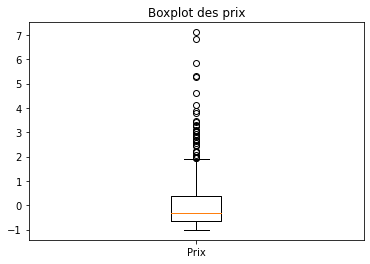

In [57]:
import matplotlib.pyplot as plt

plt.boxplot(df_final["zscore"]) ; plt.title("Boxplot des prix") ;

plt.gca().xaxis.set_ticklabels(['Prix']) ; plt.show()

# Cette dernière ligne plt.gca() permet d'ajouter des étiquettes aux boîtes

In [73]:
import plotly.express as px

points='suspectedoutliers', # ['all', 'outliers', 'suspectedoutliers', False]

df=result['price']
fig = px.box(data_frame=df, x="price", y=None, 
          orientation="h", 
          boxmode="group", #['group', 'overlay']
           range_y=None, points='suspectedoutliers', # ['all', 'outliers', 'suspectedoutliers', False]
          title="Répartion des prix unitaires et visualisation des Outilers potentiels & Outliers ", template=None,
          width=None, height=None)
fig.show()

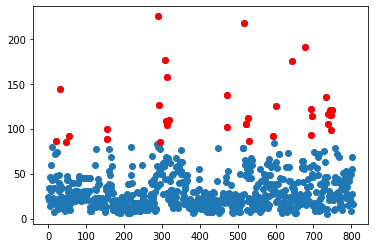

In [74]:
# On se créé 2 DataFrame pour séparé les couleurs
only_ok = df_final[(df_final['price'] < borne_sup) | (df_final['price'] > borne_inf)]
only_outliers = df_final[(df_final['price'] > borne_sup) | (df_final['price'] < borne_inf)]

# On plot
plt.scatter(only_ok['price'].index, only_ok['price'].values)
plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.show() 
